In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [60]:
# Загрузим имеющиеся данные

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [61]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [63]:
# Посмотрим на размеры обучающих и тестовых данных

print('Размер обучающего датасета:')
print('В нем: {} строчек и {} столбцов.'.format(train.shape[0], train.shape[1]))
print('Размер тестового датасета:')
print('В нем: {} строчек и {} столбцов.'.format(test.shape[0], test.shape[1]))

Размер обучающего датасета:

В нем: 1460 строчек и 81 столбцов.

Размер тестового датасета:

В нем: 1459 строчек и 80 столбцов.


In [64]:
# Получаем информацию о колонках в исходном датафрейме

train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1460 entries, 0 to 1459

Data columns (total 81 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Id             1460 non-null   int64  

 1   MSSubClass     1460 non-null   int64  

 2   MSZoning       1460 non-null   object 

 3   LotFrontage    1201 non-null   float64

 4   LotArea        1460 non-null   int64  

 5   Street         1460 non-null   object 

 6   Alley          91 non-null     object 

 7   LotShape       1460 non-null   object 

 8   LandContour    1460 non-null   object 

 9   Utilities      1460 non-null   object 

 10  LotConfig      1460 non-null   object 

 11  LandSlope      1460 non-null   object 

 12  Neighborhood   1460 non-null   object 

 13  Condition1     1460 non-null   object 

 14  Condition2     1460 non-null   object 

 15  BldgType       1460 non-null   object 

 16  HouseStyle     1460 non-null   object 

 17  OverallQual    1460 non-null  

In [65]:
# Анализируем числовые занчения столбцов в датафрейме

numerical_features = train.select_dtypes(include=[np.number])
#numerical_features.describe()
numerical_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [66]:
# Анализируем оставшиеся столбцы в датафрейме

numerical_features = train.select_dtypes(include=[object])
numerical_features.describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


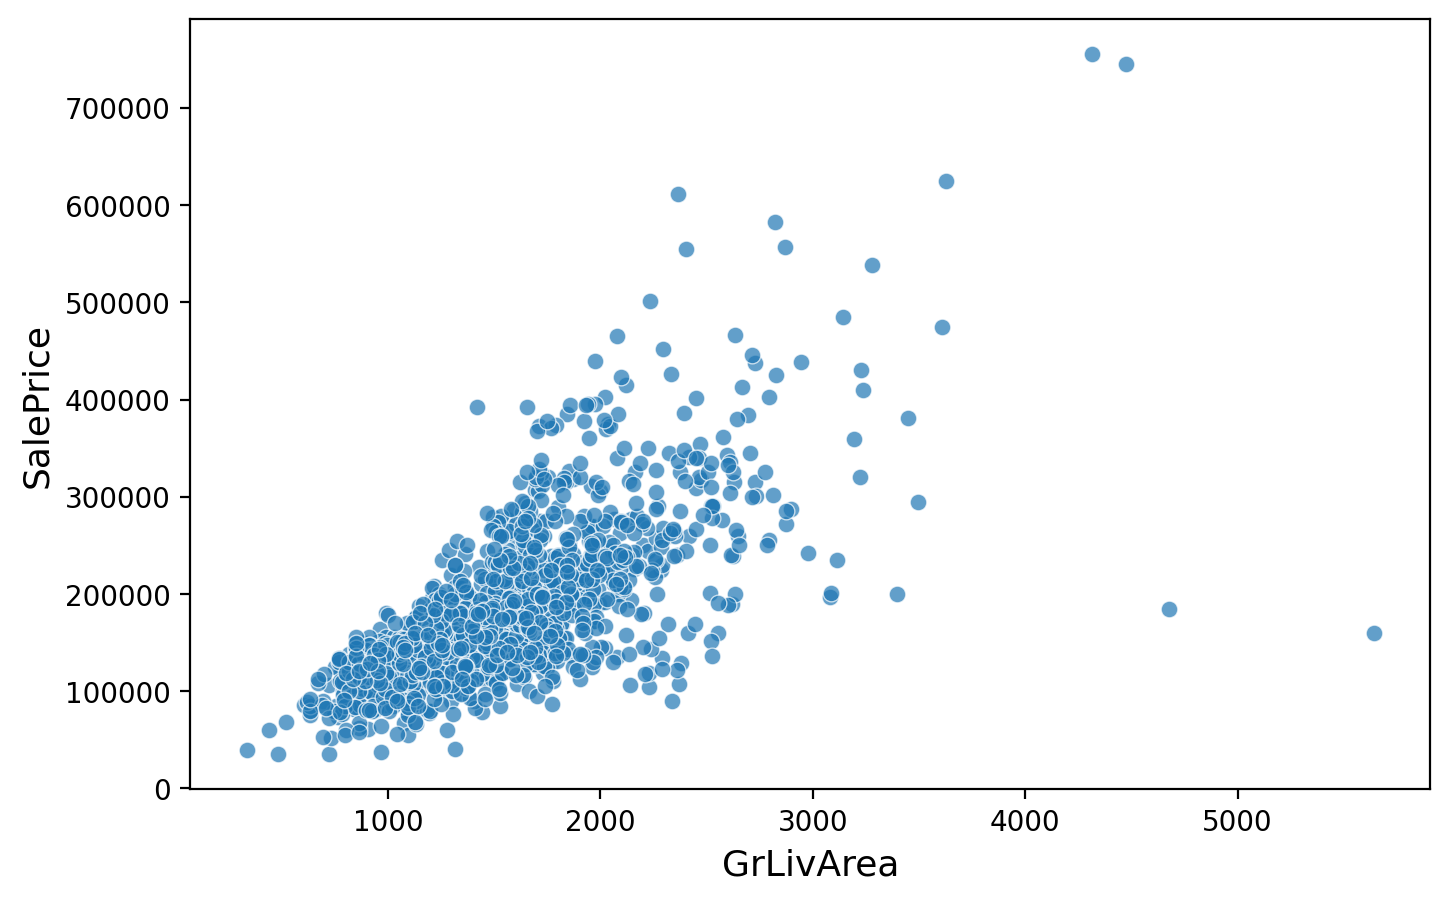

In [67]:
# Изобразим график зависимости 'GrLivArea' и 'SalePrice'

plt.figure(figsize=(8,5), dpi=200)
sns.scatterplot(data=train, x = 'GrLivArea', y = 'SalePrice', alpha = 0.7)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Исходя из увденного графика мы видим, что два значения "GrLivArea" с большим значением имеют низкую цену,
Эти значения являются выбросами и мы их можем безопасно удалить**

In [68]:
# Удалим замеченные нами выбросы данных
 
index_to_drop = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index

train = train.drop(index_to_drop)

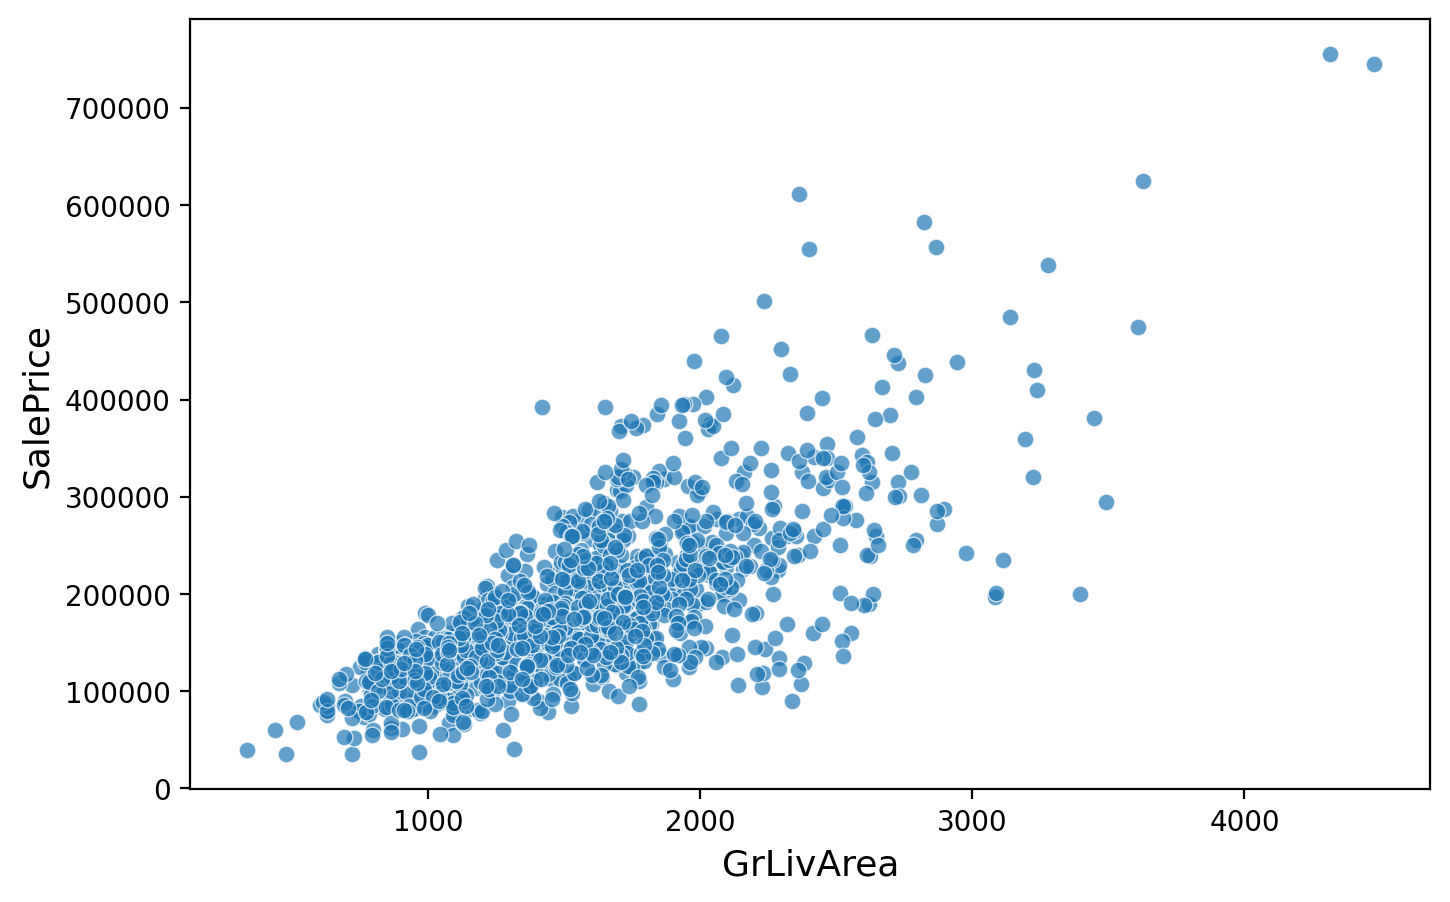

In [69]:
# Повтроно изобразим график зависимости 'GrLivArea' и 'SalePrice'

plt.figure(figsize=(8,5), dpi=200)
sns.scatterplot(data=train, x = 'GrLivArea', y = 'SalePrice', alpha = 0.7)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

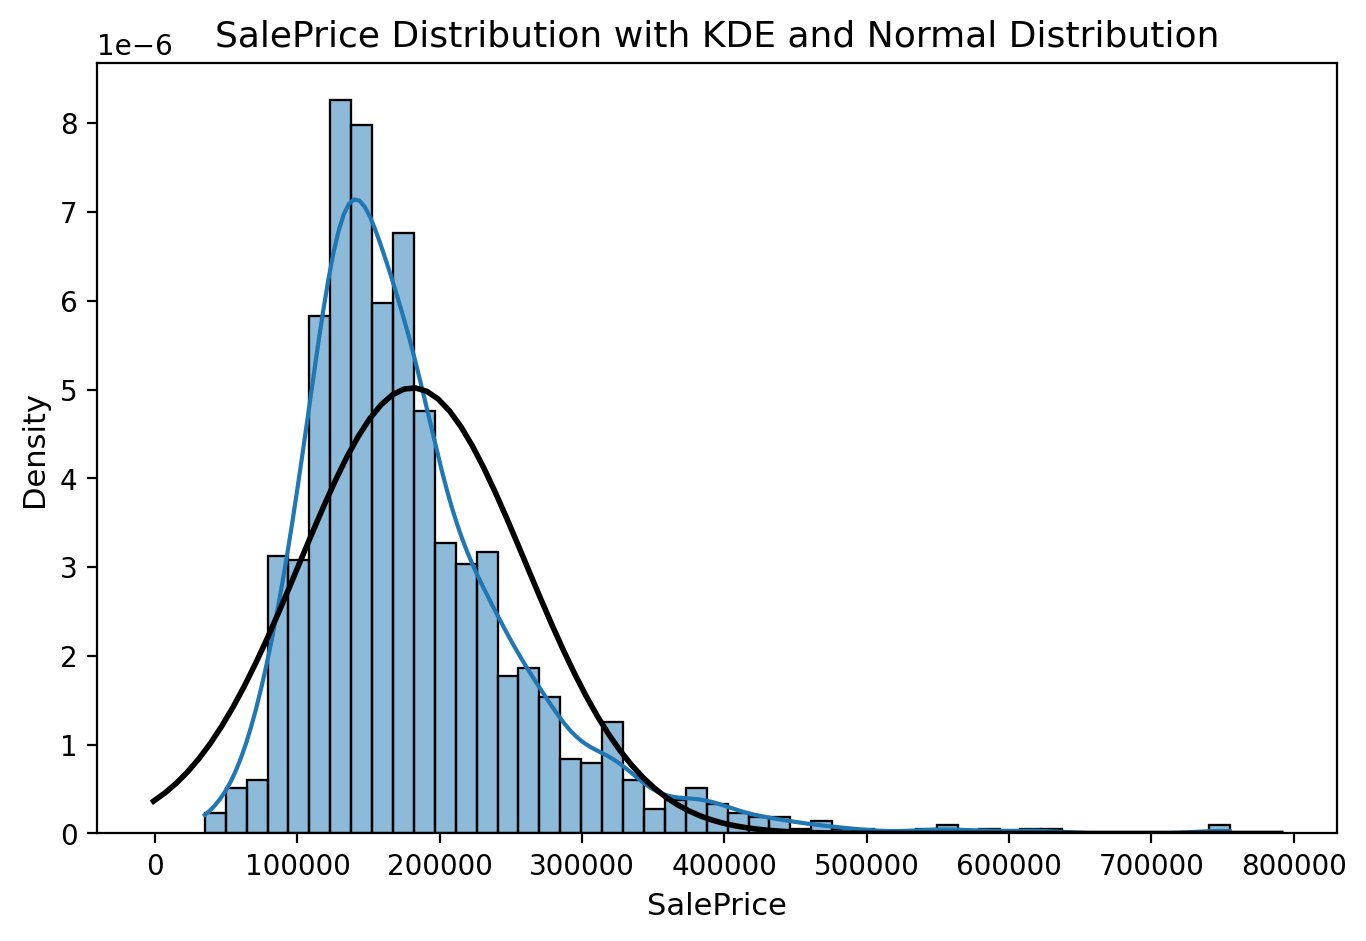

In [70]:
plt.figure(figsize=(8,5), dpi=200)
sns.histplot(train['SalePrice'], kde=True, stat='density')

# Добавляем нормальное распределение
mu, sigma = norm.fit(train['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title('SalePrice Distribution with KDE and Normal Distribution', fontsize=13)
plt.xlabel('SalePrice', fontsize=11)
plt.ylabel('Density', fontsize=11)

plt.show()

**Целевая переменная имеет смещение. Поскольку (линейные) модели предпочитают нормально распределенные данные, нам необходимо преобразовать эту переменную и сделать ее более близкой к нормальному распределению.**

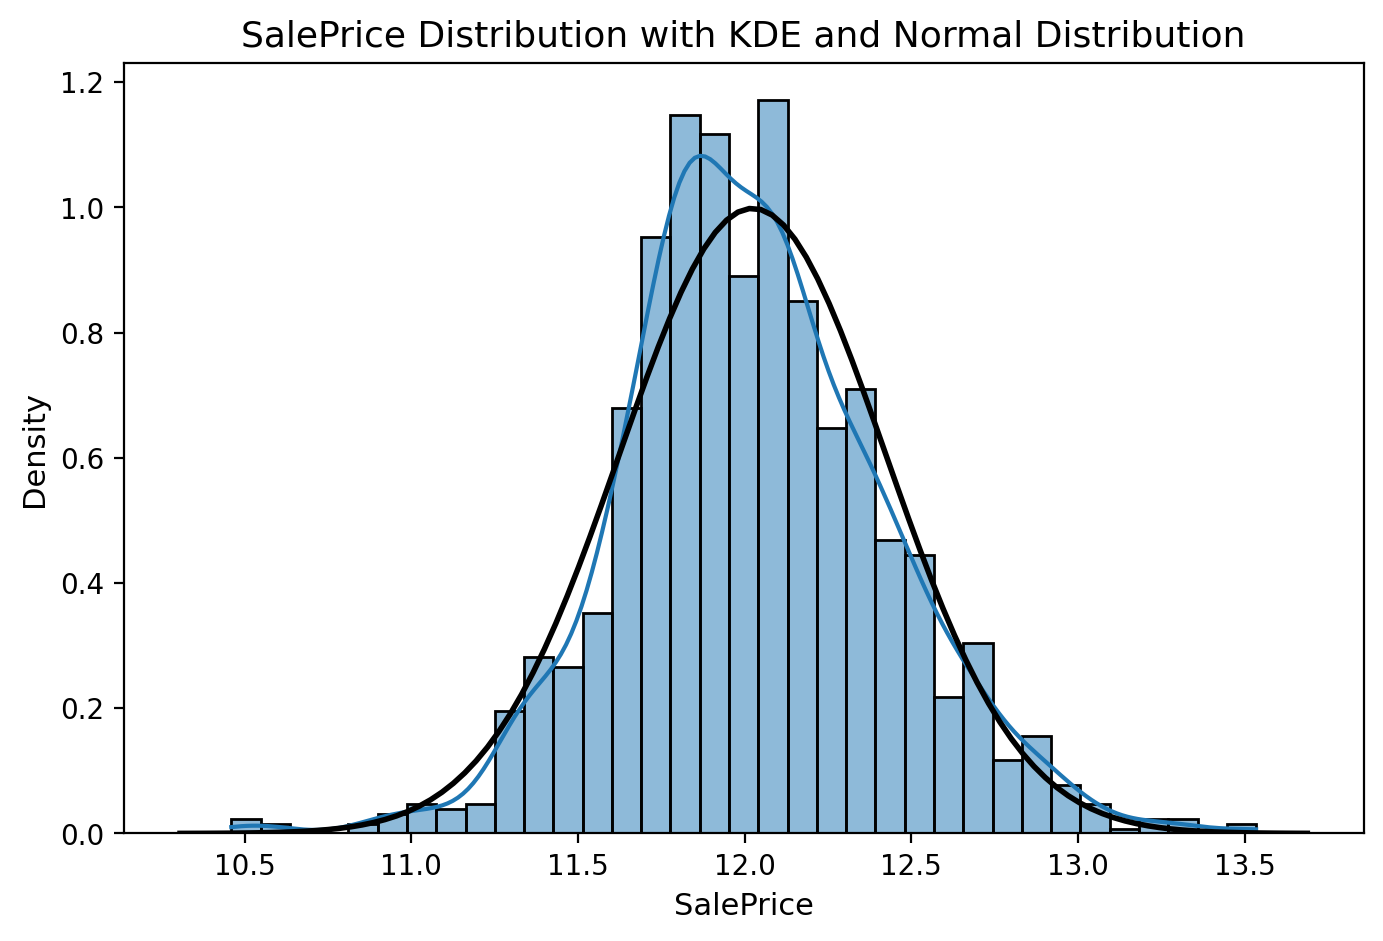

In [71]:
# !! Обратить внимание на это !!

train["SalePrice"] = np.log1p(train["SalePrice"])

plt.figure(figsize=(8,5), dpi=200)
sns.histplot(train['SalePrice'], kde=True, stat='density')

# Добавляем нормальное распределение
mu, sigma = norm.fit(train['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title('SalePrice Distribution with KDE and Normal Distribution', fontsize=13)
plt.xlabel('SalePrice', fontsize=11)
plt.ylabel('Density', fontsize=11)

plt.show()

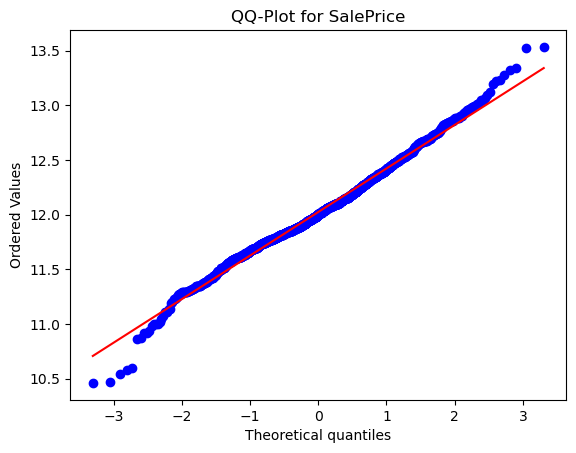

In [72]:
# Создаем QQ-график для переменной 'SalePrice'
qq_plot = stats.probplot(train['SalePrice'], plot=plt)

plt.title('QQ-Plot for SalePrice')
plt.show()

In [73]:
# Для более эфективной очистки данных объеденим их в одну таблицу

# Запомним исходное колличество строк в каждом из исходном файлов
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['SalePrice']

df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice', 'Id'], axis=1, inplace=True)
print("all_data size is : {}".format(df.shape))

all_data size is : (2917, 79)


In [74]:
# Посмотрим на колличество пропущенных значений

df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

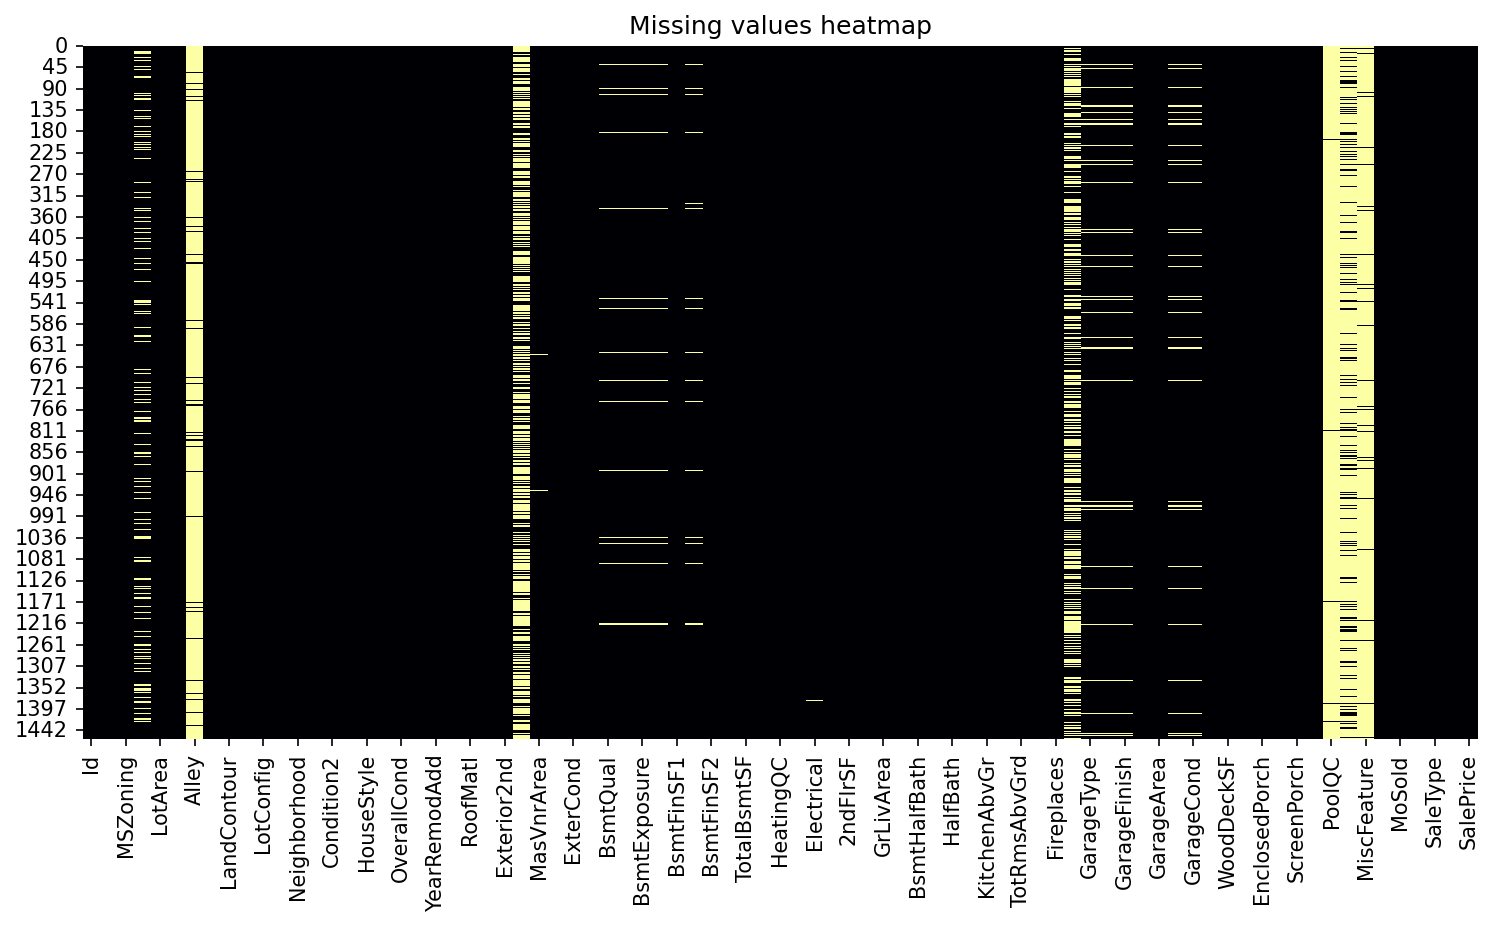

In [75]:
# С помощью тепловой карты построим график пропущенных значений
# видим достаточно большое колличиество пропущенных значений для некоторых колонок

df.isnull().sum()
plt.figure(figsize = (12,6), dpi=150)
sns.heatmap(train.isnull(), cbar = False, cmap = 'inferno').set_title("Missing values heatmap");

In [76]:
# Выведем в отдельный датафрейм
# 1 - тип колонки
# 2 - Колличество пропущенных значений
# 3 - Процент от всех пропущенных занчений
# 4 - Колличество уникальных занчений
# 5 - Колличесвто имеющихся значений для каждой из колонок

def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df) * 100
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum

summary(df).sort_values('missing#', ascending=False).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
PoolQC,object,2908,99.691464,3,9
MiscFeature,object,2812,96.400411,4,105
Alley,object,2719,93.212204,2,198
Fence,object,2346,80.425094,4,571
MasVnrType,object,1766,60.541652,3,1151
FireplaceQu,object,1420,48.680151,5,1497
LotFrontage,float64,486,16.660953,128,2431
GarageYrBlt,float64,159,5.450806,103,2758
GarageFinish,object,159,5.450806,3,2758
GarageQual,object,159,5.450806,5,2758


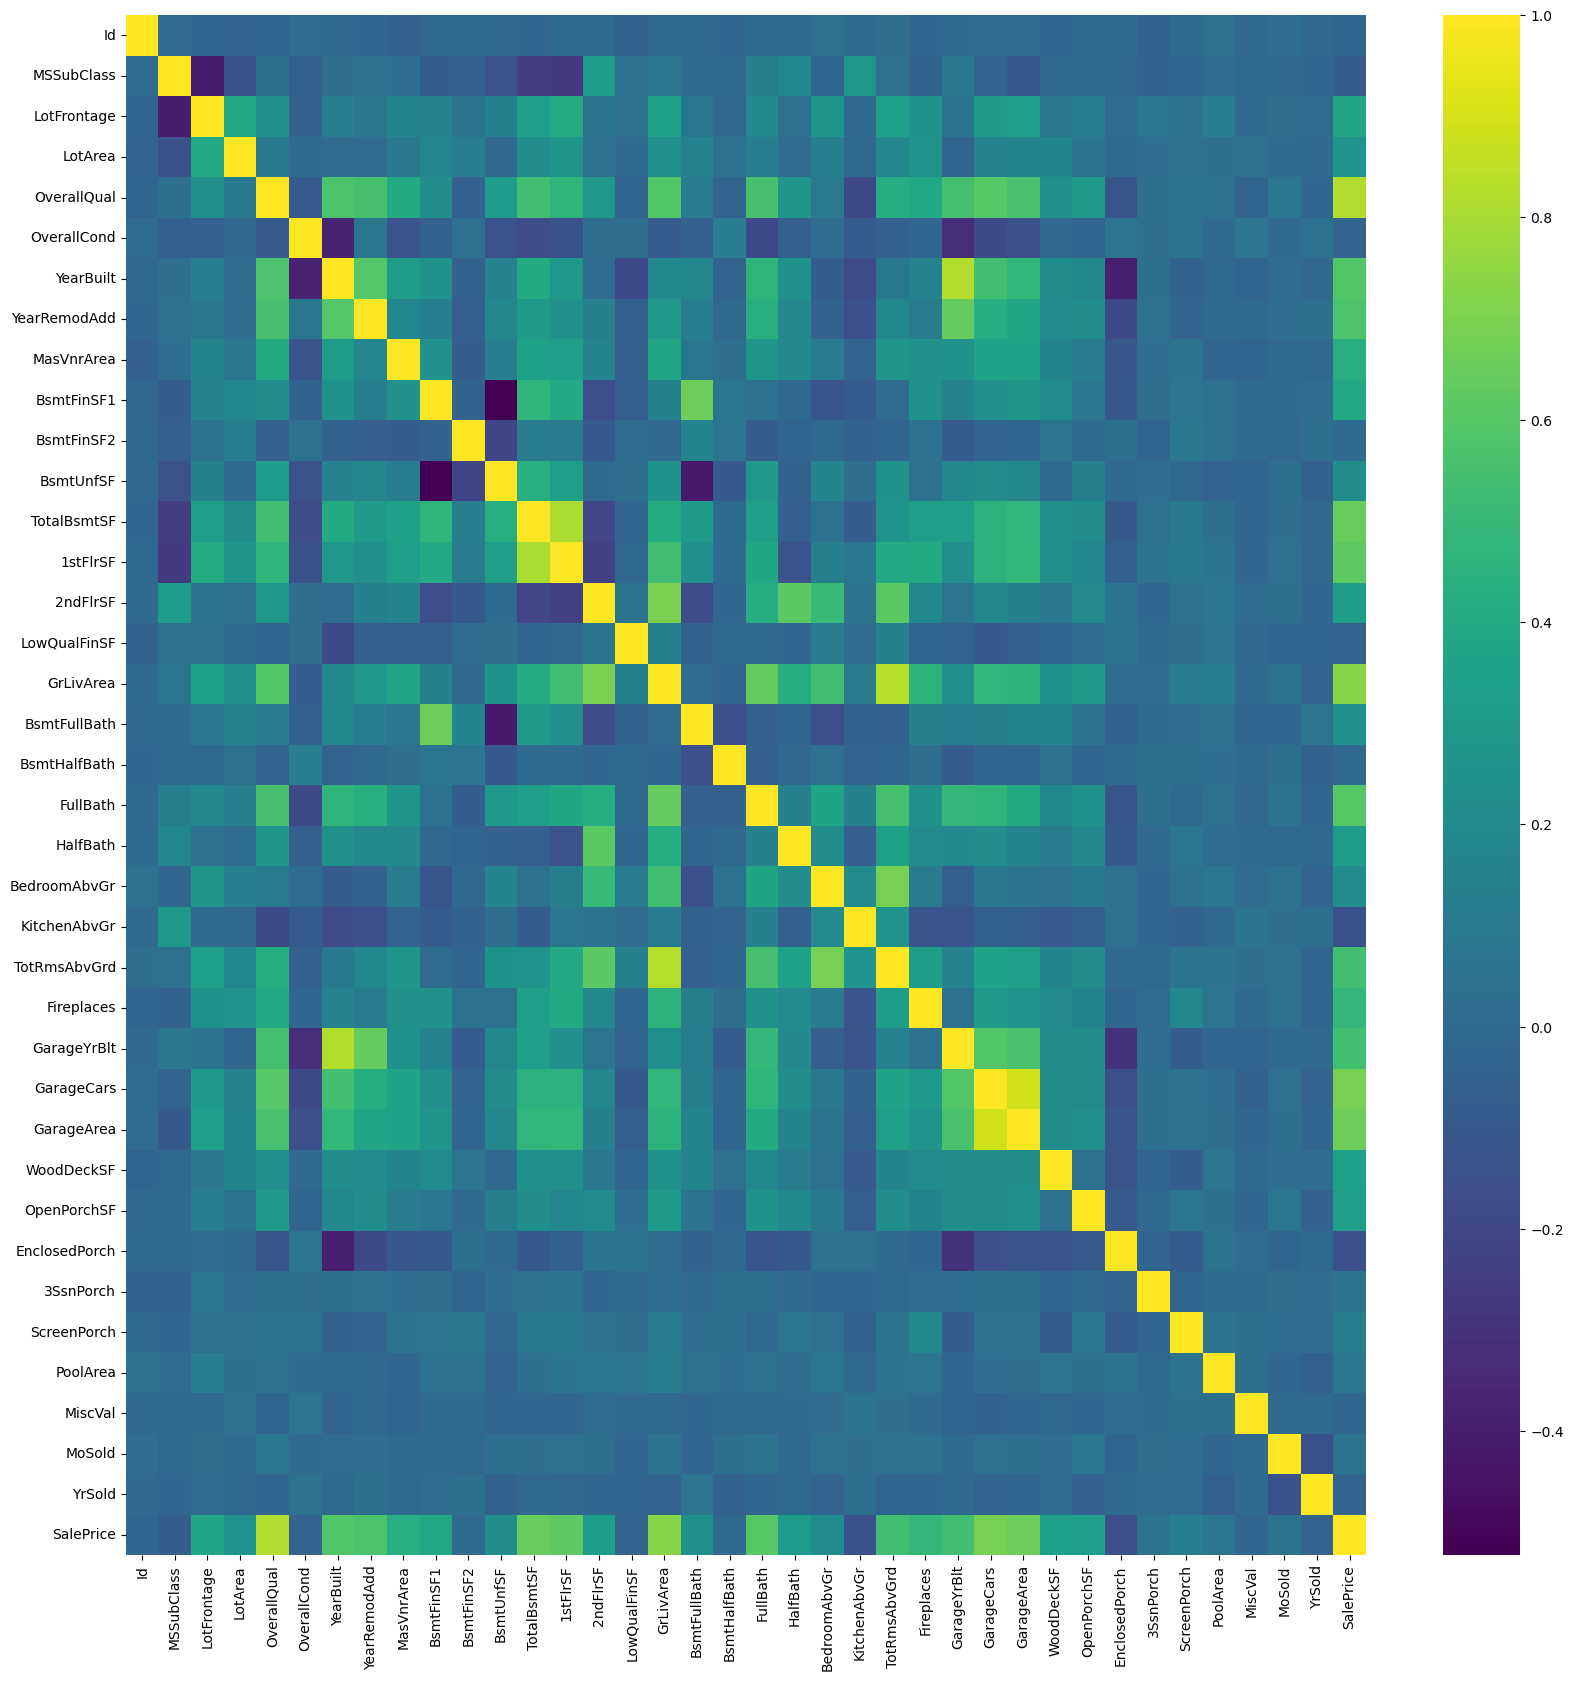

In [77]:
# Смотрим кореляцию признаков с целевой переменной

plt.figure(figsize=(20,20))
sns.heatmap(train.drop(columns=train.select_dtypes('object')).corr(), cmap='viridis')
plt.show()

In [78]:
# Приступим к заполнению пропущенных значений для этого датасета

# Согласно описанию данных, NA означает "Отсутствие бассейна" (No Pool) 
df['PoolQC'].fillna('None', inplace=True)

# Аналогичным способом заполним значения для следующих колонок
miss_col =  ['MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 
            # Заполним "None" отсутствующую информацию о гаражах
            'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
            # Заполним "None" отсутствующую информацию о подвалах
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            # Заполним "None" отсутствующую информацию об облицовке
            'MasVnrType']

for miss in miss_col:
    df[miss].fillna('None', inplace=True)


# Площадь каждой улицы, примыкающей к дому, вероятно, имеет схожую площадь с другими домами
# в её районе, мы можем заполнить отсутствующие значения медианным значением для данного района.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


# Поскольку отсутствие гаража = отсутствие автомобилей в таком гараже
# Поэтому заполним пропущенные значения нулевыми значениями

# MasVnrArea - параметр о наличие облицовки его также обнулим

for miss in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', \
             'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[miss].fillna(0, inplace=True)



In [79]:
# Попробуем заменить пропущенные значения самыми распространёнными значениями
print("Для колонки - MSZoning") # MSZoning - Общая классификация зонирования
print(df['MSZoning'].value_counts())
df['MSZoning'].fillna('RL', inplace=True)
print()

print("Для колонки - Electrical")
print(df['Electrical'].value_counts())
df['Electrical'].fillna('SBrkr', inplace=True)
print()

print("Для колонки - KitchenQual") 
print(df['KitchenQual'].value_counts())
df['KitchenQual'].fillna('TA', inplace=True)
print()

print("Для колонки - Exterior1st") 
print(df['Exterior1st'].value_counts())
df['Exterior1st'].fillna('VinylSd', inplace=True)
print()

print("Для колонки - Exterior2nd") 
print(df['Exterior2nd'].value_counts())
df['Exterior2nd'].fillna('VinylSd', inplace=True)
print()

print("Для колонки - SaleType") 
print(df['SaleType'].value_counts())
df['SaleType'].fillna('WD', inplace=True)
print()


# Поскольку мы имеем всего 1 значение отличающееся от всех, мы можем сказать,
# что эта колонка не является важной по отношению к целевой переменной
print("Для колонки - Utilities")
print(df['Utilities'].value_counts())

df.drop('Utilities', axis=1, inplace=True)
print()

Для колонки - MSZoning

MSZoning

RL         2263

RM          460

FV          139

RH           26

C (all)      25

Name: count, dtype: int64



Для колонки - Electrical

Electrical

SBrkr    2669

FuseA     188

FuseF      50

FuseP       8

Mix         1

Name: count, dtype: int64



Для колонки - KitchenQual

KitchenQual

TA    1492

Gd    1151

Ex     203

Fa      70

Name: count, dtype: int64



Для колонки - Exterior1st

Exterior1st

VinylSd    1025

MetalSd     450

HdBoard     442

Wd Sdng     411

Plywood     221

CemntBd     125

BrkFace      87

WdShing      56

AsbShng      44

Stucco       42

BrkComm       6

AsphShn       2

Stone         2

CBlock        2

ImStucc       1

Name: count, dtype: int64



Для колонки - Exterior2nd

Exterior2nd

VinylSd    1014

MetalSd     447

HdBoard     406

Wd Sdng     391

Plywood     270

CmentBd     125

Wd Shng      81

BrkFace      47

Stucco       46

AsbShng      38

Brk Cmn      22

ImStucc      15

Stone         6

AsphShn 

In [80]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [81]:
# Поскольку мы имеем всего 1 значение отличающееся от всех, мы можем сказать,
# что эта колонка не является важной по отношению к целевой переменной

#print(df['Utilities'].value_counts())

#df.drop('Utilities', axis=1, inplace=True)

In [82]:
df["Functional"] = df["Functional"].fillna("Typ")

In [83]:
summary(df).sort_values('missing#', ascending=False).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
MSSubClass,int64,0,0.000000,16,2917
BedroomAbvGr,int64,0,0.000000,8,2917
GarageType,object,0,0.000000,7,2917
FireplaceQu,object,0,0.000000,6,2917
Fireplaces,int64,0,0.000000,5,2917
Functional,object,0,0.000000,7,2917
TotRmsAbvGrd,int64,0,0.000000,14,2917
KitchenQual,object,0,0.000000,4,2917
KitchenAbvGr,int64,0,0.000000,4,2917
HalfBath,int64,0,0.000000,3,2917


In [84]:
# Теперь заменим некотороые типы данных

df['MSSubClass'] = df['MSSubClass'].astype('str')
df['OverallCond'] = df['OverallCond'].astype('str')
df['YrSold'] = df['YrSold'].astype('str')
df['MoSold'] = df['MoSold'].astype('str')

In [85]:
# Добавим колонку TotalSF, которую составим из колонок:
# 1stFlrSF  2ndFlrSF

df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']

In [86]:
# Числовые признаки

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF'],
      dtype='object')

In [87]:
# Передадим слудующим переменным категориальные значения

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lbe = LabelEncoder()
    df[col] = lbe.fit_transform(df[col])

In [88]:
# Теперь нам останется немного - передать каждой нечисловой переменной, Дамми переменную

df = pd.get_dummies(df)
df.shape

(2917, 220)

In [89]:
train = df[:ntrain]
test = df[ntrain:]

print(train.shape)
print(test.shape)

(1458, 220)

(1459, 220)


**Сформируем необходимые нам для обучения и настройки модели выборки**

In [90]:
from sklearn.model_selection import train_test_split

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(train, y_train, test_size=0.2, random_state=101)

In [91]:
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test_val = scaler.transform(X_test_val)

In [110]:
scaler = StandardScaler()
scaler.fit(train)
test = scaler.transform(test)

**Переходим у к обучениям модели**

In [92]:
# Импортируем бибилиотеки необходимые нам для обучения модели

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [93]:
# Попробуем проанализировать стандартные способы анализа данных, для этого рассмотрим следующие модели

# 1 -> LinearRegression
lin_reg = LinearRegression()
# 2 -> Lasso
lasso = Lasso()
# 3 -> Ridge
ridge = Ridge()
# 4 -> ElasticNet
elastic_net = ElasticNet()

# 5 -> LinearSVR
lin_svr = LinearSVR(max_iter=10000, dual='auto')
# 6 -> SVR
svr = SVR()

# 7 -> RandomForestRegressor
Random_Forest = RandomForestRegressor()
# 8 -> AdaBoostRegressor
Ada_Boost = AdaBoostRegressor()
# 9 -> GradientBoostingRegressor
Grad_Boost = GradientBoostingRegressor()

In [36]:
def models_score(models):
    scores_dict = {}
    
    for model in models:
        scores = cross_val_score(model, X_train_val, y_train_val,
                         scoring='neg_mean_squared_error', cv=5)
        mean_score = abs(scores.mean())
    
        model_name = str(model)
        scores_dict[model_name] = mean_score
    
    return scores_dict

In [37]:
models = [lin_reg, lasso, ridge, elastic_net, lin_svr, svr, Random_Forest, Ada_Boost, Grad_Boost]


tabel_score = models_score(models)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

  warnings.warn(

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

  warnings.warn(

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

  warnings.warn(

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

  warnings.warn(

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

  warnings.warn(


In [38]:
# Сформируем результаты в виде датафрейма, попробуем найти самое лучше значение для моделей
Base_Score = pd.DataFrame(data=tabel_score, index=['Base_Score']).T


Base_Score.sort_values('Base_Score')

,Base_Score
GradientBoostingRegressor(),1.542071e-02
Ridge(),1.613709e-02
RandomForestRegressor(),1.940119e-02
AdaBoostRegressor(),2.762256e-02
SVR(),3.777779e-02
Lasso(),1.645471e-01
ElasticNet(),1.645471e-01
"LinearSVR(dual='auto', max_iter=10000)",4.493867e+00
LinearRegression(),1.529131e+25


**Таким образом мы можем выбрать следующие 3 модели, чтобы затем с помощью GridSearch попытаться улучшить получившиеся значения**

    1 -> GradientBoostingRegressor
    2 -> Ridge
    3 -> RandomForestRegressor

In [47]:
# GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

Grad_Boost_CVsearch = GridSearchCV(estimator=Grad_Boost, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
Grad_Boost_CVsearch.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [42]:
# Ridge

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

Ridge_CVsearch = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
Ridge_CVsearch.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [48]:
# RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

Random_Forest_CVsearch = GridSearchCV(estimator=Random_Forest, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error')
Random_Forest_CVsearch.fit(X_train_val, y_train_val)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [94]:
# Теперь посмотрим на результаты нашей настройки

from sklearn.metrics import mean_squared_error

models = [Grad_Boost_CVsearch, Ridge_CVsearch, Random_Forest_CVsearch]

for i, model in enumerate(models):
    # Получаем лучшую модель из GridSearchCV
    best_model = model.best_estimator_

    # Получаем предсказания на НЕ отмасштабированных тестовых данных
    predictions = best_model.predict(X_test_val)

    print("Для модели {}, мы получаем следующее значение".format(i+1))
    print(np.sqrt(mean_squared_error(predictions, y_test_val)))


Для модели 1, мы получаем следующее значение

0.1301627711417425

Для модели 2, мы получаем следующее значение

0.12539938869356443

Для модели 3, мы получаем следующее значение

0.14884551041245653


In [119]:
# Теперь сформируем окончательный ответ на поставленную перед нами задачу

#final_predictions = np.expm1(Ridge_CVsearch.best_estimator_.predict(test))
final_predictions = np.expm1(Ridge_CVsearch.best_estimator_.predict(test))

test_first = pd.read_csv('test.csv')

# Формируем результаты
result = pd.DataFrame(columns=['Id', 'SalePrice'])
result['Id'] = test_first['Id']
result['SalePrice'] = final_predictions

In [120]:
result.head()

,Id,SalePrice
0,1461,122750.995074
1,1462,166962.455106
2,1463,179239.717979
3,1464,197916.963039
4,1465,201837.234392


In [121]:
result.to_csv('submission_Ridge_CV.csv', index=False)

In [122]:
final_predictions = np.expm1(Grad_Boost_CVsearch.best_estimator_.predict(test))

test_first = pd.read_csv('test.csv')

# Формируем результаты
result = pd.DataFrame(columns=['Id', 'SalePrice'])
result['Id'] = test_first['Id']
result['SalePrice'] = final_predictions

result.to_csv('submission_Grad_Boost_CV.csv', index=False)

In [123]:
final_predictions = np.expm1(Random_Forest_CVsearch.best_estimator_.predict(test))

test_first = pd.read_csv('test.csv')

# Формируем результаты
result = pd.DataFrame(columns=['Id', 'SalePrice'])
result['Id'] = test_first['Id']
result['SalePrice'] = final_predictions

result.to_csv('submission_Random_Forest_CV.csv', index=False)